<a href="https://colab.research.google.com/github/swamyshravan/data-science-projects/blob/main/KNearestNeighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn

### Problem 1

**Loading Data**

In [ ]:
data =  pd.read_csv('ElectrGridStab.csv')
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


**classify dependent and independent variables**

In [ ]:
X = data.loc[:,'tau1':'stab']
y = data['stabf']
#X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

**Normalise the independent variables**

In [ ]:
sc = StandardScaler()
norm_train = sc.fit_transform(X_train)
norm_test = sc.fit_transform(X_test)

**Fitting KNN for our data with k=31**

In [ ]:
model = KNeighborsClassifier(n_neighbors=31)
model.fit(norm_train, y_train)

KNeighborsClassifier(n_neighbors=31)

**Predicting test values and creating a confusion matrix**

In [ ]:
y_pred = model.predict(norm_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['predicted'])
#confusion_matrix

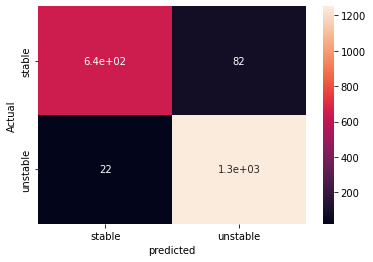

In [ ]:
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('accuracy of the model is: ',metrics.accuracy_score(y_pred, y_test)*100,'%')

accuracy of the model is:  94.8 %
